In [12]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

In [14]:


# Load the data
data = pd.read_csv('merged_data.csv')  # Replace 'your_dataset.csv' with the path to your dataset file
"""
# Examine the data structure
print("Data Dimensions:", data.shape)  # Show number of rows and columns
print("\nData Info:")
print(data.info())  # Display data types and non-null counts
print("\nSummary Statistics:")
print(data.describe())  # Summary statistics for numerical columns
"""
# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(data.head())

# Identify target and feature columns
# Replace 'target_column_name' with the actual name of your target column
target_column = 'target_column_name'
features = [col for col in data.columns if col != target_column]

print("\nTarget Column:", target_column)
print("Feature Columns:", features)



First Few Rows:
      #YY   MM   DD   hh    mm  WDIR  WSPD  GST  WVHT   DPD  ...    PRES  \
0     NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN   NaN   NaN  ...     NaN   
1  2020.0  1.0  1.0  0.0   0.0  69.0   5.5  7.1   1.3  14.3  ...  1014.4   
2  2020.0  1.0  1.0  0.0  10.0  64.0   4.5  5.5  99.0  99.0  ...  1014.4   
3  2020.0  1.0  1.0  0.0  20.0  63.0   4.7  5.8  99.0  99.0  ...  1014.5   
4  2020.0  1.0  1.0  0.0  30.0  72.0   5.1  6.4  99.0  99.0  ...  1014.6   

   ATMP   WTMP   DEWP   VIS  TIDE  WDI  R WSP  D GST  WSP  
0   NaN    NaN    NaN   NaN   NaN  NaN    NaN    NaN  NaN  
1  26.7   28.1  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
2  26.6  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
3  26.9  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
4  27.0  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  

[5 rows x 22 columns]

Target Column: target_column_name
Feature Columns: ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES',

Clean the Data

In [33]:
# Drop the first row (index 0)
data = data.drop(index=0)

# Reset the index if needed (optional)
data = data.reset_index(drop=True)

# Display the updated DataFrame to confirm the first row is dropped
print("Data after dropping the first row (before dropping invalid data):")
print(data.head())

# 1. Handle Missing Values
# Option 1: Drop rows with any missing values
# Drop columns where all values are NaN
# Specify columns to drop (replace these names with the actual column names in your dataset)
columns_to_drop = ['DEWP', 'VIS', 'TIDE', 'WDI', 'R WSP','D GST', 'WSP','APD','DPD']

# Drop the specified columns
data_dropped = data.drop(columns=columns_to_drop)

# Filter rows based on specified conditions
# Drop rows where pressure is higher than 2000
data_filtered = data_dropped[data_dropped['PRES'] <= 2000]

data_filtered = data_filtered[~data_filtered['ATMP'].isin([999])]

data_filtered = data_filtered[~data_filtered['WTMP'].isin([999])]

# Drop rows where WVHT is 99 or 999
data_filtered = data_filtered[~data_filtered['WVHT'].isin([99, 999])]

# Display the resulting DataFrame to confirm columns have been dropped and filters applied
print("Data after dropping specified columns and filtering rows based on conditions:")
print(data_filtered.head())

# Option 2: Fill missing values
# Fill numerical columns with the mean of each column
data_filled = data_filtered.fillna(data_filtered.mean())
print("Data after filling missing values with mean:")
print(data_filled.head())
print(data_filled.shape)
""""
# 2. Correct Data Types
# Convert columns to appropriate types if needed
# For example, convert a date column to datetime
# Replace 'date_column' with the actual column name containing date information
data['date_column'] = pd.to_datetime(data['date_column'], errors='coerce')

# Display the cleaned data info
print("\nData Info after Cleaning:")
print(data_cleaned.info())
"""

Data after dropping the first row (before dropping invalid data):
      #YY   MM   DD   hh    mm   WDIR  WSPD  GST  WVHT   DPD  ...    PRES  \
0  2020.0  1.0  1.0  1.0  10.0  114.0   2.6  3.5  99.0  99.0  ...  1015.2   
1  2020.0  1.0  1.0  1.0  20.0   88.0   5.1  6.7  99.0  99.0  ...  1015.3   
2  2020.0  1.0  1.0  1.0  30.0   81.0   5.1  6.4  99.0  99.0  ...  1015.3   
3  2020.0  1.0  1.0  1.0  40.0   88.0   3.6  5.3  99.0  99.0  ...  1015.2   
4  2020.0  1.0  1.0  1.0  50.0   98.0   4.2  5.6  99.0  99.0  ...  1015.2   

   ATMP   WTMP   DEWP   VIS  TIDE  WDI  R WSP  D GST  WSP  
0  26.2  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
1  26.4  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
2  26.4  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
3  26.5  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  
4  26.7  999.0  999.0  99.0  99.0  NaN    NaN    NaN  NaN  

[5 rows x 22 columns]
Data after dropping specified columns and filtering rows based on conditions:
       #YY

'"\n# 2. Correct Data Types\n# Convert columns to appropriate types if needed\n# For example, convert a date column to datetime\n# Replace \'date_column\' with the actual column name containing date information\ndata[\'date_column\'] = pd.to_datetime(data[\'date_column\'], errors=\'coerce\')\n\n# Display the cleaned data info\nprint("\nData Info after Cleaning:")\nprint(data_cleaned.info())\n'

Descriptive Statistics:
                #YY            MM            DD            hh            mm  \
count  29864.000000  29864.000000  29864.000000  29864.000000  29864.000000   
mean    2021.576179      6.298453     15.464740     11.447294      0.002009   
std        1.071416      3.525411      8.831641      6.913918      0.216510   
min     2020.000000      1.000000      1.000000      0.000000      0.000000   
25%     2021.000000      3.000000      8.000000      5.000000      0.000000   
50%     2022.000000      6.000000     15.000000     11.000000      0.000000   
75%     2023.000000     10.000000     23.000000     17.000000      0.000000   
max     2023.000000     12.000000     31.000000     23.000000     30.000000   

               WDIR          WSPD           GST          WVHT           MWD  \
count  29864.000000  29864.000000  29864.000000  29864.000000  29864.000000   
mean     106.568721      4.593698      5.362546      1.285009     51.458411   
std       46.577499      0.

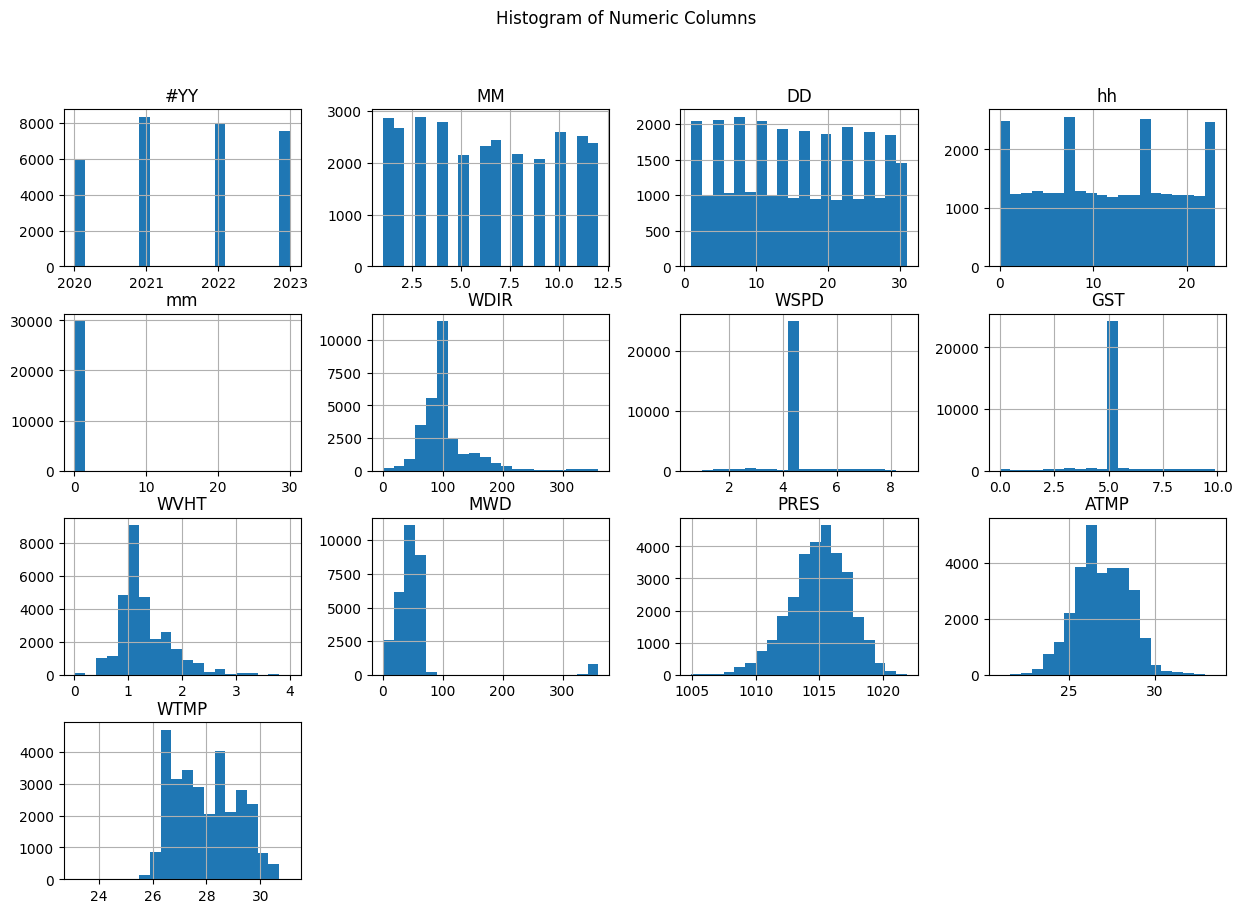

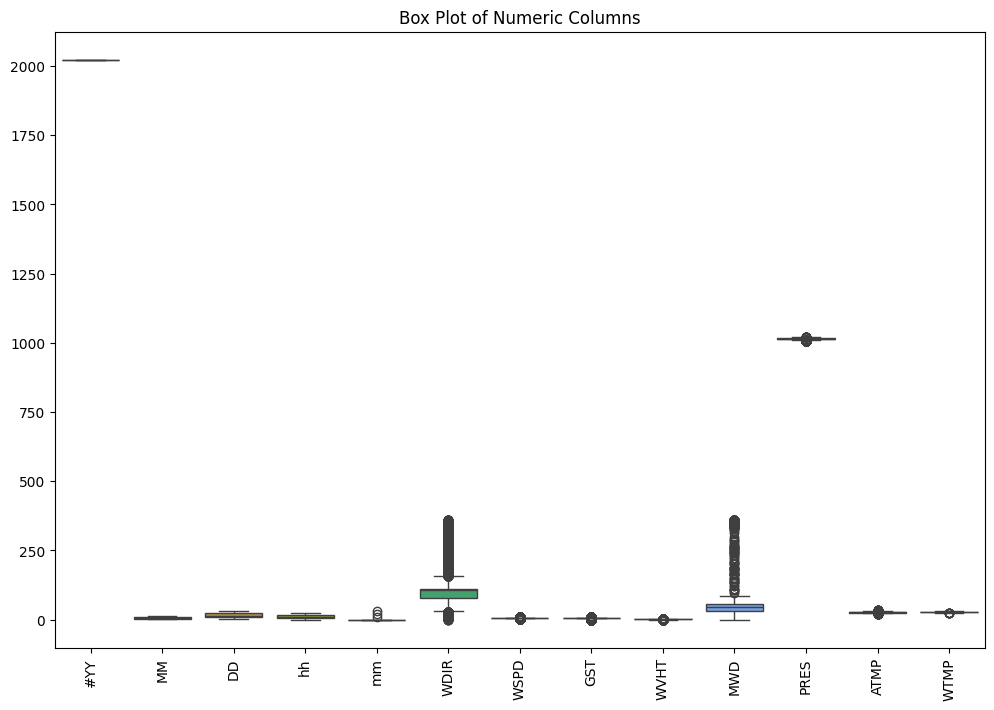


Correlation Matrix:
               #YY        MM        DD        hh        mm      WDIR  \
#YY   1.000000e+00  0.013861  0.017568  0.001796 -0.002103 -0.052599   
MM    1.386124e-02  1.000000 -0.004798  0.000564 -0.002540  0.089142   
DD    1.756782e-02 -0.004798  1.000000  0.002142 -0.002240 -0.031938   
hh    1.796461e-03  0.000564  0.002142  1.000000 -0.007759 -0.127645   
mm   -2.103347e-03 -0.002540 -0.002240 -0.007759  1.000000 -0.002234   
WDIR -5.259879e-02  0.089142 -0.031938 -0.127645 -0.002234  1.000000   
WSPD  2.740000e-15 -0.055149  0.001685  0.123524 -0.003809 -0.283481   
GST   1.137100e-14  0.006698 -0.005418  0.070465 -0.002726 -0.159561   
WVHT -4.499091e-02 -0.081165 -0.021649  0.024698 -0.003621 -0.039233   
MWD   3.096716e-02 -0.035462 -0.015226  0.011866  0.000437  0.074051   
PRES -8.624699e-02 -0.450769 -0.036749 -0.140780  0.005284 -0.237636   
ATMP  4.495517e-02  0.475742 -0.032635  0.207770 -0.000652 -0.134329   
WTMP  6.254793e-02  0.701960 -0.001297  0.0

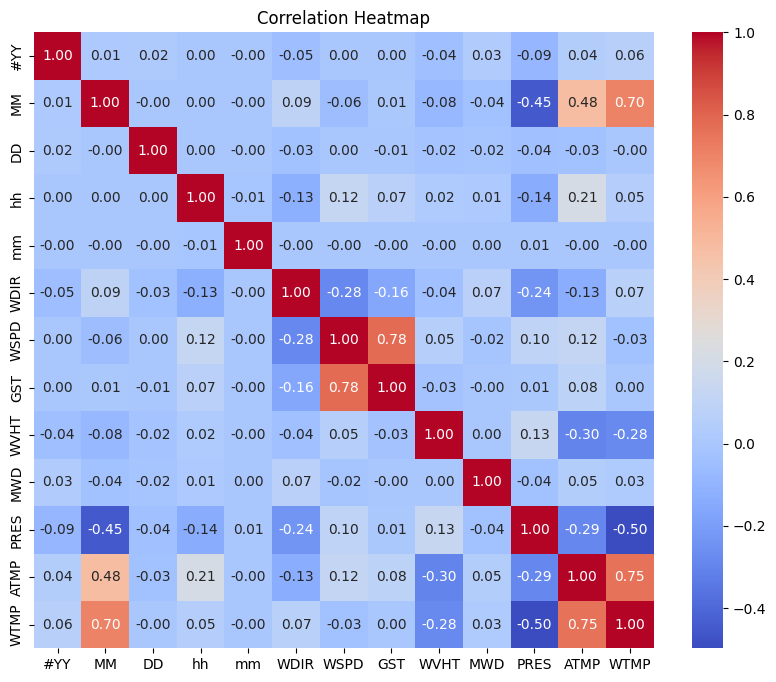

In [34]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data_filled.describe())  # Provides statistics like mean, median, std for numeric columns

# 2. Data Visualization
# Histograms for each numeric column
data_filled.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of Numeric Columns")
plt.show()
"""
# Scatter plot example for two variables (replace 'column_x' and 'column_y' with actual column names)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='column_x', y='column_y')
plt.title("Scatter Plot between column_x and column_y")
plt.show()
"""

# Box plot to check distributions and outliers for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_filled.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.show()

# 3. Correlation Analysis
# Correlation matrix
correlation_matrix = data_filled.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Standardization and Normalization

In [35]:
# Select only numeric columns for standardization
def std(dataset):
  numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
  scaler = StandardScaler()
  dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
  print("Data after Standardization:")
  print(dataset[numeric_columns].head())

# Min-Max scaling
def MinMaxScaling(dataset):
  numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
  scaler = MinMaxScaler()
  dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
  print("Data after Min-Max Normalization:")
  print(dataset[numeric_columns].head())

# Max Abs scaling
def MaxAbsScaling(dataset):
  numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
  scaler = MaxAbsScaler()
  dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
  print("Data after Max Abs Scaling:")
  print(dataset[numeric_columns].head())


Split Dataset into Training set and Test set.

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
# Assuming dataset is loaded as a pandas dataframe named df
# Replace `file_path` with the actual path to your CSV data file if needed
# Create a copy of the data dataframe to ensure data remains unchanged
df = data_filled.copy()
print (data_filled.head())
std(df)  # Update the path accordingly

# Separate features and target
X = df.drop(columns=['WVHT'])  # Drop the target column from features
y = df['WVHT']  # Target column to predict

# Split dataset into 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Drop WVHT column from test set (already done in X_test by splitting)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Combine X_train and y_train into a single DataFrame for saving
train_data = X_train.copy()
train_data['WVHT'] = y_train  # Adding the target column back for training data

# Combine X_test and y_test into a single DataFrame for saving
test_data = X_test.copy()
test_data['WVHT'] = y_test  # Adding the target column back for test data

# Save to CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

print("Training and test datasets have been saved as train.csv and test.csv respectively.")


       #YY   MM   DD   hh   mm   WDIR  WSPD  GST  WVHT   MWD    PRES  ATMP  \
5   2020.0  1.0  1.0  2.0  0.0   82.0   4.5  6.1   1.4  40.0  1015.2  27.1   
11  2020.0  1.0  1.0  3.0  0.0  101.0   3.5  4.7   1.5  42.0  1015.2  26.7   
17  2020.0  1.0  1.0  4.0  0.0  140.0   2.1  3.2   1.3  40.0  1014.8  26.6   
23  2020.0  1.0  1.0  5.0  0.0  125.0   1.3  2.0   1.3  42.0  1014.7  26.2   
29  2020.0  1.0  1.0  6.0  0.0  127.0   2.4  3.2   1.3  44.0  1013.7  26.2   

    WTMP  
5   28.2  
11  28.1  
17  28.1  
23  28.1  
29  28.1  
Data after Standardization:
         #YY        MM        DD        hh       mm      WDIR      WSPD  \
5  -1.471142 -1.502957 -1.637859 -1.366440 -0.00928 -0.527489 -0.115753   
11 -1.471142 -1.502957 -1.637859 -1.221802 -0.00928 -0.119560 -1.351140   
17 -1.471142 -1.502957 -1.637859 -1.077163 -0.00928  0.717768 -3.080681   
23 -1.471142 -1.502957 -1.637859 -0.932525 -0.00928  0.395719 -4.068990   
29 -1.471142 -1.502957 -1.637859 -0.787887 -0.00928  0.438659 

# Linear Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Model Coefficients:", linear_model.coef_)
print("Model Intercept:", linear_model.intercept_)

Mean Squared Error: 0.8347704162965678
R-squared: 0.14619261256111482
Model Coefficients: [-0.01890987  0.21610857 -0.02470737  0.07170479 -0.00323785 -0.05207833
  0.21528099 -0.1894527   0.03969153  0.02573812 -0.2823508  -0.19587003]
Model Intercept: 0.0032317641965752112


/var/folders/jn/s0h_8_f96h3cr21q3p6wmlbm0000gn/T/ipykernel_33107/1515381931.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


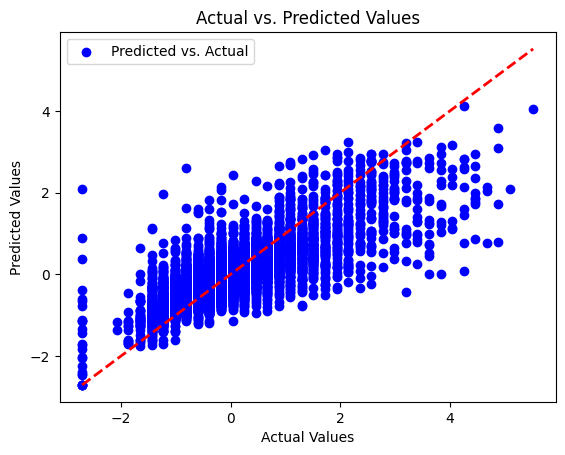

In [56]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

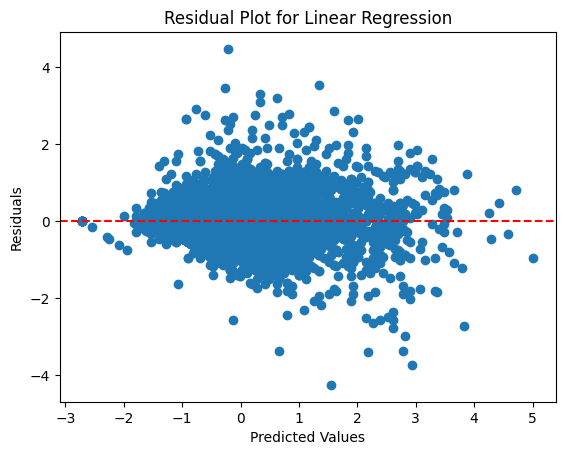

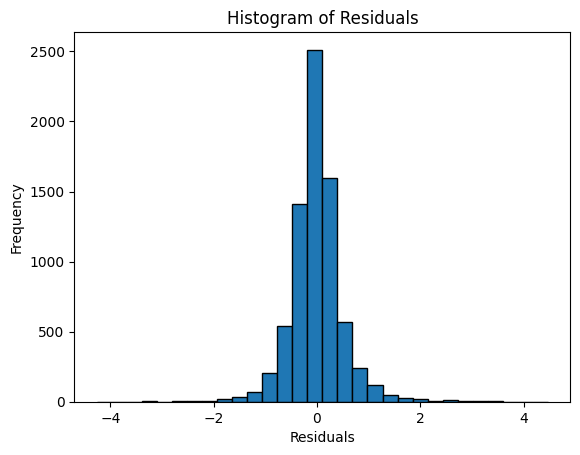

In [51]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# KNN Model

In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Create a KNN Regressor model with a specified number of neighbors
k = 5  # You can change this to the desired number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.2675169695240048
R-squared: 0.7263822957955518


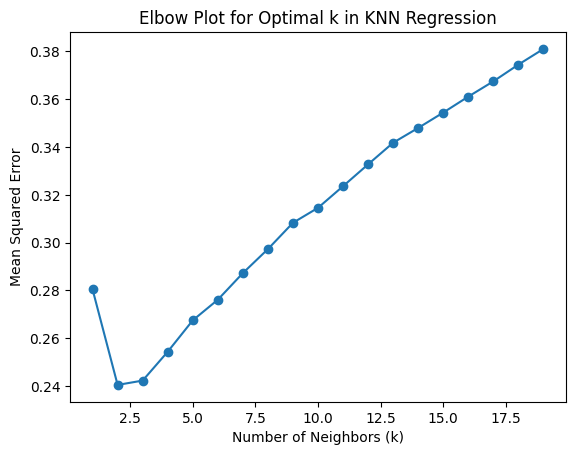

In [55]:
from sklearn.metrics import mean_squared_error

errors = []
for k in range(1, 20):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
    errors.append(mse)

plt.plot(range(1, 20), errors, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Plot for Optimal k in KNN Regression')
plt.show()

/var/folders/jn/s0h_8_f96h3cr21q3p6wmlbm0000gn/T/ipykernel_33107/570729023.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


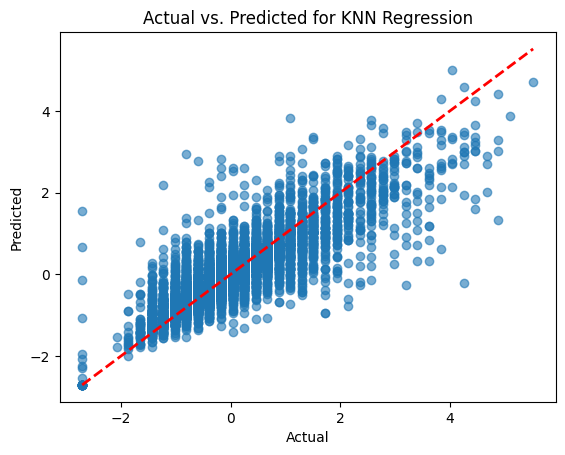

In [53]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted for KNN Regression')
plt.show()

# CNN Model

Model Training:

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error

# Define the MyCNN model
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()

        # Convolutional Layer 1 with padding
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)  # Reduced filters to 16

        # Pooling Layer: Max pooling with kernel size = 2, stride = 2
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        # Convolutional Layer 2 with padding
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)  # Reduced filters to 32

        # Fully Connected Layer 1 (adjusted to 32)
        self.fc1 = nn.Linear(32 * 3, 32)  # Adjusted based on smaller output size after pooling

        # Fully Connected Layer 2
        self.fc2 = nn.Linear(32, 16)

        # Fully Connected Layer 3 (Output Layer)
        self.fc3 = nn.Linear(16, 1)  # Output 1 value for regression

        # ReLU activation
        self.relu = nn.ReLU()

    def forward(self, x):
        # First block: conv1 -> relu -> pool
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Second block: conv2 -> relu -> pool
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        # Flatten the output for the fully connected layers
        x = x.view(-1, 32 * 3)  # Adjusted to match the flattened size after pooling

        # Fully connected layers with ReLU activations
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Remove the extra dimension from X_train and X_test by squeezing the second dimension
X_train = X_train.squeeze(1)
X_test = X_test.squeeze(1)

# Convert data to PyTorch tensors with the correct shape
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, channels, sequence_length]
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)   # Ensure y_train has shape [batch_size, 1]
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1).to(device)    # Shape: [batch_size, channels, sequence_length]
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)     # Ensure y_test has shape [batch_size, 1]

# Create DataLoader for batching with a smaller batch size
batch_size = 16
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
model = MyCNN().to(device)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with fewer epochs
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        labels = labels.view(-1, 1)  # Ensure labels have shape [batch_size, 1]

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Testing loop
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Calculate and display Mean Squared Error on test set
mse = mean_squared_error(y_true, y_pred)
print(f"Test Mean Squared Error: {mse:.10f}")


/var/folders/hz/cvw8rdj16t749qjbqgg1_xpc0000gn/T/ipykernel_48077/310832058.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1).to(device)  # Shape: [batch_size, channels, sequence_length]
/var/folders/hz/cvw8rdj16t749qjbqgg1_xpc0000gn/T/ipykernel_48077/310832058.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)   # Ensure y_train has shape [batch_size, 1]
/var/folders/hz/cvw8rdj16t749qjbqgg1_xpc0000gn/T/ipykernel_48077/310832058.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().deta

Epoch [1/5], Loss: 0.7290
Epoch [2/5], Loss: 0.5858
Epoch [3/5], Loss: 0.5462
Epoch [4/5], Loss: 0.5222
Epoch [5/5], Loss: 0.5022
Test Mean Squared Error: 0.5365484953


In [39]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_true, y_pred)

# Output the R-squared value
print(f"R-squared: {r2:.10f}")


R-squared: 0.4581101018
